# Results and terminal inputs for homework 1



In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import pickle 
import os
import sys
sys.path.insert(0, '../')
from hw_helpers import model, layers_model
%matplotlib inline 


def plot_data(data_list):
    plt.figure(figsize = (20,20))
    plt.xlabel('dagger iterations')
    plt.ylabel('reward')
    for data in data_list:
        dagger_x_axis = range(len(data['reward_means']))
        rewards = np.array(data['reward_means'])
        std = np.array(data['reward_stds'])
        plt.plot(dagger_x_axis,rewards)
        plt.fill_between(dagger_x_axis,rewards-std,rewards+std,alpha=0.5)
    plt.show()

### General idea about expert rewards
The expert after 300 rollouts
mean return 10339.787492891033
std of return 739.6647091496138

# Explanation for Humanoid-v2 data.
I trained dagger with 35 dagger iterations, one training on the initial 300-rollout dataset first. Each iteration had 1000 batches, with each batch containing 100 example points randomly selected from all of the rollouts. That makes a total of 36000 batches trained upon, for 3.6 million observation points.

I trained the normal behavioral cloning algorithm on the 300 rollout set only. That rollout set contained 1000x300 data points, for 300,000 total datapoints. each data point was trained upon around 10x. It is possible that we needed to expand this initial rollout size to see better results... We can try that later w/o retrying dagger. 

The expert averages around 10,000 reward, so dagger approached that.

The network had hidden layers of [64,32] dimension. 

Humanoid was selected for DAgger bc it wasn't learning well!

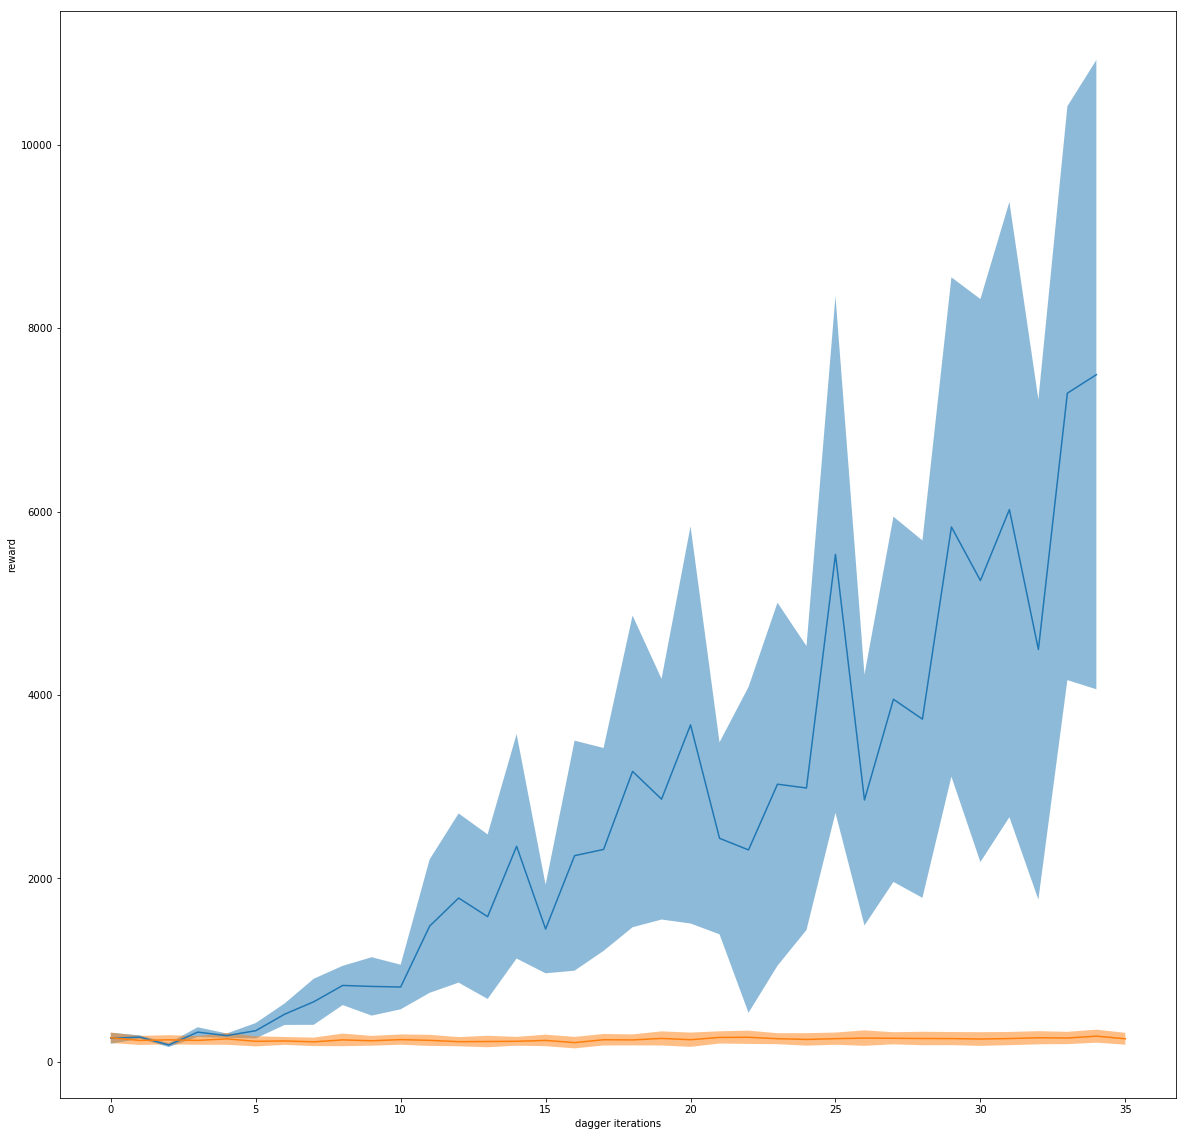

In [4]:
with open('../my_data/dagger_performance_data/Humanoid-v2_model_1000-batches_dagger_35', 'rb') as f:
    dagger_data = pickle.load(f)
with open('../my_data/dagger_performance_data/Humanoid-v2_model_36000-batches', 'rb') as f:
    normal_data = pickle.load(f)
data_list = [dagger_data,normal_data]

plot_data(data_list)

## Instructions for generating these results.

in homework/hw1, run 
-python3 train_layers_model.py Humanoid-v2.pkl --dagger --dagger_iter 35 --rollouts_per_dagger 100 --batches 1000 --save_performance_data

in homework/hw1, run
-python3 train_layers_model.py Humanoid-v2.pkl --batches 36000 --save_performance_data

To run these models and see some funny stuff:

(venv) Matthews-MacBook-Air-6:hw1 matthewhunt$ python3 run_layers_model.py 'my_save_loc/Humanoid-v2_model_1000-batches_dagger_35.ckpt' Humanoid-v2 --render

and 

(venv) Matthews-MacBook-Air-6:hw1 matthewhunt$ python3 run_layers_model.py 'my_save_loc/Humanoid-v2_model_36000-batches.ckpt' Humanoid-v2 --render

## Models

## Behavioral Cloning 
![SegmentLocal](../results_and_plots/non_dagger_humanoid.gif "segment")

## DAgger
![SegmentLocal](../results_and_plots/dagger_humanoid.gif "segment")

